<a href="https://colab.research.google.com/github/Ferpm7/Regresion-Logistica/blob/main/Actividad_7_Regresi%C3%B3n_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fernando Pérez Martínez - A01769688

In [1]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('cuentas_credicel.csv', encoding='latin1')
df

<ipython-input-2-0007bc6baa22>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cuentas_credicel.csv', encoding='latin1')


,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,porc_eng,limite_credito,semana_actual,cp_cliente,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,3,HDNAWQ3A,30,12/11/21 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,40.02,5000,26,NaN,23.0,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,4,M418YNR4,33,12/11/21 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,35.01,6000,13,NaN,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,5,SZ7V3NZT,37,13/11/21 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,0,74,NaN,58.0,TANTOYUCA,VER.,0,0,0
3,6,9I08UIQZ,38,13/11/21 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,7000,13,NaN,42.0,AMXTLAN PUE,NaN,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,7,JMF4LKYU,44,13/11/21 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,25.01,7000,74,NaN,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,18/04/23 18:45,Motorola,Moto E13,26S,3349.0,297.0,0.0,...,8.87,10000,0,97880,22.0,OXKUTZCAB,YUC,Oxkutzcab,Yucatan,PACT990804MYNCCH05
22731,22968,NWB2EA8J,96479,18/04/23 18:46,Motorola,Moto E22i,26S,4100.0,1209.0,0.0,...,29.49,5000,0,37295,27.0,LEON,GTO,Leon,Guanajuato,HEGB950620MGTRMN03
22732,22969,VDTRJ2W6,96442,18/04/23 18:47,Samsung,A13,26S,4849.0,1152.0,0.0,...,23.76,4750,0,20210,36.0,AGUASCALIENTES,AGS,Aguascalientes,Aguascalientes,GADF870205HASLZL07
22733,22970,PETLF56C,96536,18/04/23 18:49,Samsung,A53 5G,39S,9799.0,2799.0,0.0,...,28.56,7000,0,78434,53.0,SOLEDAD DE GRACIANO SANCHEZ,SLP,Soledad De Graciano Sanchez,San Luis Potosi,DELJ700417HSPLRS03


In [3]:
#Verificamos información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

In [4]:
df.head()

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,porc_eng,limite_credito,semana_actual,cp_cliente,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,3,HDNAWQ3A,30,12/11/21 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,40.02,5000,26,NaN,23.0,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,4,M418YNR4,33,12/11/21 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,35.01,6000,13,NaN,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,5,SZ7V3NZT,37,13/11/21 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,0,74,NaN,58.0,TANTOYUCA,VER.,0,0,0
3,6,9I08UIQZ,38,13/11/21 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,7000,13,NaN,42.0,AMXTLAN PUE,NaN,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,7,JMF4LKYU,44,13/11/21 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,25.01,7000,74,NaN,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07


#Cambiamos la columna folio_solictud ya que esta se puede tomar como una de tipo string o categorica debido a que es un folio o etiqueta que se asigna y no como tal valores numericos. Tambien la variable de fraude ya que solo contiene valores 1 y 0 que repreentan si realmente hubo un fraude o no, por lo que podemosn trabajarla posteriormente de mejor manera

In [5]:
# Convertir la columna 'columna_enteros' de int64 a object
df['folio'] = df['folio'].astype(object)

# Verificar el tipo de datos de la columna
print(df['folio'].dtype)

# Convertir la columna 'columna_enteros' de int64 a object
df['folio_solicitud'] = df['folio_solicitud'].astype(object)

# Verificar el tipo de datos de la columna
print(df['folio_solicitud'].dtype)

# Convertir la columna 'columna_enteros' de int64 a object
df['fraude'] = df['fraude'].astype(object)

# Verificar el tipo de datos de la columna
print(df['fraude'].dtype)

object
object
object


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  object 
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  object 
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

In [7]:
conteo_por_columna = df.count()
conteo_por_columna

folio                 22735
tag                   22735
folio_solicitud       22735
fecha                 22735
marca                 22735
modelo                22735
plazo                 22735
precio                22735
enganche              22735
descuento             22735
semana                22735
monto_financiado      22735
costo_total           22735
monto_accesorios      22735
agente_venta          22735
dis_venta             22735
status                22735
fraude                22735
empresa               22722
inversion             22735
pagos_realizados      22735
reautorizacion        22735
fecha_ultimo_pago     19379
fecha_pago_proximo    19379
status_cuenta         19421
puntos                22735
riesgo                22735
score_buro            22735
razones_buro          15395
porc_eng              22735
limite_credito        22735
semana_actual         22735
cp_cliente            15492
edad_cliente          22726
cd_cliente            22735
edo_cliente         

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  object 
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  object 
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

In [9]:
#Identificar valores nulos por columna
valores_nulos=df.isnull().sum()
valores_nulos

folio                    0
tag                      0
folio_solicitud          0
fecha                    0
marca                    0
modelo                   0
plazo                    0
precio                   0
enganche                 0
descuento                0
semana                   0
monto_financiado         0
costo_total              0
monto_accesorios         0
agente_venta             0
dis_venta                0
status                   0
fraude                   0
empresa                 13
inversion                0
pagos_realizados         0
reautorizacion           0
fecha_ultimo_pago     3356
fecha_pago_proximo    3356
status_cuenta         3314
puntos                   0
riesgo                   0
score_buro               0
razones_buro          7340
porc_eng                 0
limite_credito           0
semana_actual            0
cp_cliente            7243
edad_cliente             9
cd_cliente               0
edo_cliente              8
cd_venta                 0
e

In [10]:
#Identificar valores nulos por dataframe
valores_nulos=df.isnull().sum().sum()
valores_nulos

24639

In [11]:
# Obtén las columnas numéricas
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Obtén las columnas categóricas
df_categoric = df.select_dtypes(include=['object'])

# Ahora 'df_numeric' contiene solo las columnas numéricas y 'df_categoric' contiene solo las columnas categóricas


In [12]:
df_numeric

,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,semana_actual,edad_cliente
0,1949.0,780.0,0.0,81,1169.0,2106,0.0,2,0,0,0,0,0.00,0,40.02,26,23.0
1,2999.0,1050.0,0.0,225,1949.0,2925,0.0,2,0,0,0,0,0.00,0,35.01,13,60.0
2,1959.0,490.0,0.0,170,1469.0,2210,0.0,3,0,0,0,0,0.00,0,25.01,74,58.0
3,1959.0,490.0,0.0,170,1469.0,2210,0.0,2,0,0,0,0,0.00,0,25.01,13,42.0
4,4299.0,1075.0,0.0,178,3224.0,6942,0.0,1,0,0,0,0,0.00,0,25.01,74,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3349.0,297.0,0.0,211,3052.0,5486,0.0,1,0,0,0,10,27.40,469,8.87,0,22.0
22731,4100.0,1209.0,0.0,200,2891.0,5200,0.0,1,0,0,0,9,19.00,502,29.49,0,27.0
22732,4849.0,1152.0,0.0,256,3697.0,6656,0.0,1,0,0,0,11,26.65,459,23.76,0,36.0
22733,9799.0,2799.0,0.0,386,7000.0,15054,0.0,1,0,0,0,14,-17.35,699,28.56,0,53.0


In [13]:
# Itera a través de las columnas del DataFrame
for columna in df_numeric.columns:
    if df_numeric[columna].isnull().any():
        # Verifica si la columna tiene valores nulos
        if pd.api.types.is_numeric_dtype(df_numeric[columna]):  # Verifica si la columna es numérica
            if pd.api.types.is_integer_dtype(df_numeric[columna]):  # Verifica si la columna es de tipo int64
                promedio = df_numeric[columna].mean()
                df_numeric[columna] = df_numeric[columna].fillna(round(promedio))
            else:
                promedio = df_numeric[columna].mean()
                df_numeric[columna] = df_numeric[columna].fillna(round(promedio, 1))

In [14]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   precio            22735 non-null  float64
 1   enganche          22735 non-null  float64
 2   descuento         22735 non-null  float64
 3   semana            22735 non-null  int64  
 4   monto_financiado  22735 non-null  float64
 5   costo_total       22735 non-null  int64  
 6   monto_accesorios  22735 non-null  float64
 7   status            22735 non-null  int64  
 8   inversion         22735 non-null  int64  
 9   pagos_realizados  22735 non-null  int64  
 10  reautorizacion    22735 non-null  int64  
 11  puntos            22735 non-null  int64  
 12  riesgo            22735 non-null  float64
 13  score_buro        22735 non-null  int64  
 14  porc_eng          22735 non-null  float64
 15  semana_actual     22735 non-null  int64  
 16  edad_cliente      22735 non-null  float6

In [15]:
#Identificar valores nulos por columna
valores_nulos=df_numeric.isnull().sum()
valores_nulos

precio              0
enganche            0
descuento           0
semana              0
monto_financiado    0
costo_total         0
monto_accesorios    0
status              0
inversion           0
pagos_realizados    0
reautorizacion      0
puntos              0
riesgo              0
score_buro          0
porc_eng            0
semana_actual       0
edad_cliente        0
dtype: int64

In [16]:
df_categoric

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,agente_venta,dis_venta,fraude,...,fecha_pago_proximo,status_cuenta,razones_buro,limite_credito,cp_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,3,HDNAWQ3A,30,12/11/21 19:00,ZTE,Blade A3 2020 RO B,26S,Sintia Verenice Tenorio Perez E,mic0437,0,...,NaN,NaN,NaN,5000,NaN,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,4,M418YNR4,33,12/11/21 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,Alvaro Rafael Pascual,mic015,0,...,NaN,NaN,NaN,6000,NaN,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,5,SZ7V3NZT,37,13/11/21 14:13,ZTE,BLADE A3 2020 Gris,13S,Sintia Verenice Tenorio Perez E,mic0437,0,...,NaN,Cancelado,NaN,0,NaN,TANTOYUCA,VER.,0,0,0
3,6,9I08UIQZ,38,13/11/21 15:45,ZTE,BLADE A3 2020 Gris,13S,Luz Aylin Hernandez Lopez1,mic0748,0,...,NaN,NaN,NaN,7000,NaN,AMXTLAN PUE,NaN,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,7,JMF4LKYU,44,13/11/21 16:10,MOTOROLA,G10 B,39S,Sintia Verenice Tenorio Perez E,mic0437,0,...,12/03/22 0:00,Mora,NaN,7000,NaN,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,18/04/23 18:45,Motorola,Moto E13,26S,Mildred Asuncion Arguello Caamal,svc044,0,...,25/04/23 0:00,NaN,"K0,J0,D8,E2",10000,97880,OXKUTZCAB,YUC,Oxkutzcab,Yucatan,PACT990804MYNCCH05
22731,22968,NWB2EA8J,96479,18/04/23 18:46,Motorola,Moto E22i,26S,Maria Guadalupe Vargas Lopez,PXC004,0,...,25/04/23 0:00,NaN,"K0,J0,D8,E2",5000,37295,LEON,GTO,Leon,Guanajuato,HEGB950620MGTRMN03
22732,22969,VDTRJ2W6,96442,18/04/23 18:47,Samsung,A13,26S,Nicolás Jiménez Sánchez,gph008,0,...,25/04/23 0:00,NaN,"K0,D7,F7,D8",4750,20210,AGUASCALIENTES,AGS,Aguascalientes,Aguascalientes,GADF870205HASLZL07
22733,22970,PETLF56C,96536,18/04/23 18:49,Samsung,A53 5G,39S,Maribel Ulibarri Medina,gph014,0,...,25/04/23 0:00,NaN,"J0,G1,E0,E2",7000,78434,SOLEDAD DE GRACIANO SANCHEZ,SLP,Soledad De Graciano Sanchez,San Luis Potosi,DELJ700417HSPLRS03


In [17]:
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   folio               22735 non-null  object
 1   tag                 22735 non-null  object
 2   folio_solicitud     22735 non-null  object
 3   fecha               22735 non-null  object
 4   marca               22735 non-null  object
 5   modelo              22735 non-null  object
 6   plazo               22735 non-null  object
 7   agente_venta        22735 non-null  object
 8   dis_venta           22735 non-null  object
 9   fraude              22735 non-null  object
 10  empresa             22722 non-null  object
 11  fecha_ultimo_pago   19379 non-null  object
 12  fecha_pago_proximo  19379 non-null  object
 13  status_cuenta       19421 non-null  object
 14  razones_buro        15395 non-null  object
 15  limite_credito      22735 non-null  object
 16  cp_cliente          15

In [18]:
#Identificar valores nulos por columna
valores_nulos=df_categoric.isnull().sum()
valores_nulos

folio                    0
tag                      0
folio_solicitud          0
fecha                    0
marca                    0
modelo                   0
plazo                    0
agente_venta             0
dis_venta                0
fraude                   0
empresa                 13
fecha_ultimo_pago     3356
fecha_pago_proximo    3356
status_cuenta         3314
razones_buro          7340
limite_credito           0
cp_cliente            7243
cd_cliente               0
edo_cliente              8
cd_venta                 0
edo_venta                0
curp                     0
dtype: int64

In [19]:
# Itera a través de las columnas del DataFrame
for columna in df_categoric.columns:
    if df_categoric[columna].isnull().any():
        # Verifica si la columna tiene valores nulos
        df_categoric[columna] = df_categoric[columna].bfill()


In [20]:
#Corroboramos valores nulos
valores_nulos=df_numeric.isnull().sum()
valores_nulos

precio              0
enganche            0
descuento           0
semana              0
monto_financiado    0
costo_total         0
monto_accesorios    0
status              0
inversion           0
pagos_realizados    0
reautorizacion      0
puntos              0
riesgo              0
score_buro          0
porc_eng            0
semana_actual       0
edad_cliente        0
dtype: int64

In [21]:
#Corroboramos valores nulos
valores_nulos=df_categoric.isnull().sum()
valores_nulos

folio                  0
tag                    0
folio_solicitud        0
fecha                  0
marca                  0
modelo                 0
plazo                  0
agente_venta           0
dis_venta              0
fraude                 0
empresa                0
fecha_ultimo_pago      0
fecha_pago_proximo     0
status_cuenta         35
razones_buro           0
limite_credito         0
cp_cliente             0
cd_cliente             0
edo_cliente            0
cd_venta               0
edo_venta              0
curp                   0
dtype: int64

<Figure size 1500x800 with 0 Axes>

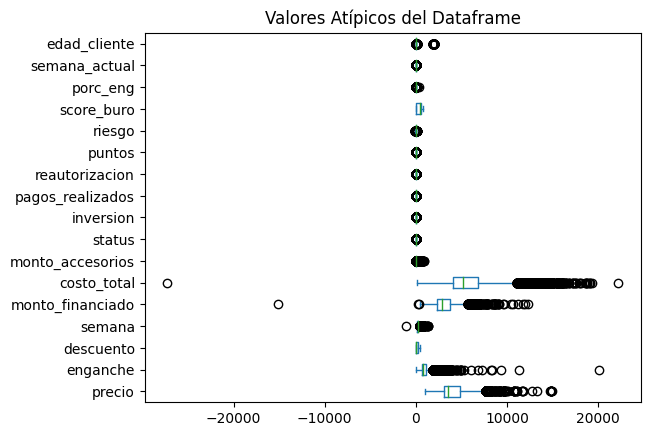

In [22]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df_numeric.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [23]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=df_numeric
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido precio               8081.558082
enganche             2356.496845
descuento             478.215020
semana                541.287392
monto_financiado     6366.317810
costo_total         12857.588246
monto_accesorios      191.260880
status                  2.611178
inversion               1.511599
pagos_realizados       39.306132
reautorizacion          0.578086
puntos                 48.354233
riesgo                 58.456322
score_buro           1142.021000
porc_eng               45.711306
semana_actual          64.380898
edad_cliente          422.315244
dtype: float64
Limite inferior permitido precio               -87.484900
enganche            -503.622066
descuento           -321.263535
semana               -65.792692
monto_financiado    -214.044583
costo_total        -1458.203597
monto_accesorios    -164.333344
status                -0.100423
inversion             -1.038408
pagos_realizados     -18.944575
reautorizacion        -0.509998
puntos              

In [24]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
df_numeric= df_numeric[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df_numeric

,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,semana_actual,edad_cliente
0,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.0,0,0.0,0.0,0.0,0.00,0,40.02,26.0,23.0
1,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.0,0,0.0,0.0,0.0,0.00,0,35.01,13.0,60.0
2,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,NaN,0,0.0,0.0,0.0,0.00,0,25.01,NaN,58.0
3,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.0,0,0.0,0.0,0.0,0.00,0,25.01,13.0,42.0
4,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,0,0.0,0.0,0.0,0.00,0,25.01,NaN,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,1.0,0,0.0,0.0,10.0,27.40,469,8.87,0.0,22.0
22731,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,1.0,0,0.0,0.0,9.0,19.00,502,29.49,0.0,27.0
22732,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,1.0,0,0.0,0.0,11.0,26.65,459,23.76,0.0,36.0
22733,NaN,NaN,0.0,386.0,NaN,NaN,0.0,1.0,0,0.0,0.0,14.0,-17.35,699,28.56,0.0,53.0


In [25]:
#Corroboramos valores nulos del dataframe4
valores_nulos=df_numeric.isnull().sum()
valores_nulos

precio              110
enganche            292
descuento            17
semana              362
monto_financiado    182
costo_total         290
monto_accesorios    617
status              154
inversion             0
pagos_realizados    184
reautorizacion      774
puntos                3
riesgo               65
score_buro            0
porc_eng            275
semana_actual       178
edad_cliente         99
dtype: int64

In [26]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=df_numeric.copy()
data_clean_num=data_clean.fillna(round(df_numeric.mean(),1))
data_clean_num

,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,semana_actual,edad_cliente
0,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.0,0,0.0,0.0,0.0,0.00,0,40.02,26.0,23.0
1,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.0,0,0.0,0.0,0.0,0.00,0,35.01,13.0,60.0
2,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,1.2,0,0.0,0.0,0.0,0.00,0,25.01,20.2,58.0
3,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.0,0,0.0,0.0,0.0,0.00,0,25.01,13.0,42.0
4,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,0,0.0,0.0,0.0,0.00,0,25.01,20.2,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,1.0,0,0.0,0.0,10.0,27.40,469,8.87,0.0,22.0
22731,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,1.0,0,0.0,0.0,9.0,19.00,502,29.49,0.0,27.0
22732,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,1.0,0,0.0,0.0,11.0,26.65,459,23.76,0.0,36.0
22733,3969.2,897.6,0.0,386.0,3043.8,5588.6,0.0,1.0,0,0.0,0.0,14.0,-17.35,699,28.56,0.0,53.0


In [27]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean_num.isnull().sum()
valores_nulos

precio              0
enganche            0
descuento           0
semana              0
monto_financiado    0
costo_total         0
monto_accesorios    0
status              0
inversion           0
pagos_realizados    0
reautorizacion      0
puntos              0
riesgo              0
score_buro          0
porc_eng            0
semana_actual       0
edad_cliente        0
dtype: int64

<Figure size 1500x800 with 0 Axes>

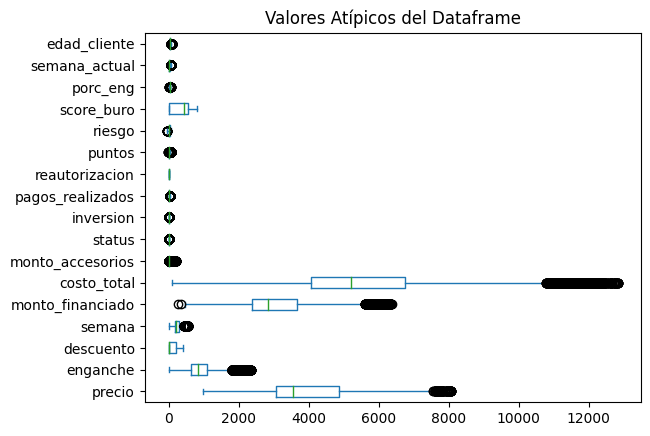

In [28]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
data_clean_num.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [29]:
# Unión por columnas
Base_limpia = pd.concat([data_clean_num, df_categoric], axis=1)
Base_limpia

,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,inversion,pagos_realizados,...,fecha_pago_proximo,status_cuenta,razones_buro,limite_credito,cp_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.0,0,0.0,...,12/03/22 0:00,Cancelado,C1,5000,72490,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.0,0,0.0,...,12/03/22 0:00,Cancelado,C1,6000,72490,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,1.2,0,0.0,...,12/03/22 0:00,Cancelado,C1,0,72490,TANTOYUCA,VER.,0,0,0
3,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.0,0,0.0,...,12/03/22 0:00,Mora,C1,7000,72490,AMXTLAN PUE,VER.,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,0,0.0,...,12/03/22 0:00,Mora,C1,7000,72490,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,1.0,0,0.0,...,25/04/23 0:00,NaN,"K0,J0,D8,E2",10000,97880,OXKUTZCAB,YUC,Oxkutzcab,Yucatan,PACT990804MYNCCH05
22731,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,1.0,0,0.0,...,25/04/23 0:00,NaN,"K0,J0,D8,E2",5000,37295,LEON,GTO,Leon,Guanajuato,HEGB950620MGTRMN03
22732,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,1.0,0,0.0,...,25/04/23 0:00,NaN,"K0,D7,F7,D8",4750,20210,AGUASCALIENTES,AGS,Aguascalientes,Aguascalientes,GADF870205HASLZL07
22733,3969.2,897.6,0.0,386.0,3043.8,5588.6,0.0,1.0,0,0.0,...,25/04/23 0:00,NaN,"J0,G1,E0,E2",7000,78434,SOLEDAD DE GRACIANO SANCHEZ,SLP,Soledad De Graciano Sanchez,San Luis Potosi,DELJ700417HSPLRS03


In [30]:
#Identificar valores nulos por columna
valores_nulos=Base_limpia.isnull().sum()
valores_nulos

precio                 0
enganche               0
descuento              0
semana                 0
monto_financiado       0
costo_total            0
monto_accesorios       0
status                 0
inversion              0
pagos_realizados       0
reautorizacion         0
puntos                 0
riesgo                 0
score_buro             0
porc_eng               0
semana_actual          0
edad_cliente           0
folio                  0
tag                    0
folio_solicitud        0
fecha                  0
marca                  0
modelo                 0
plazo                  0
agente_venta           0
dis_venta              0
fraude                 0
empresa                0
fecha_ultimo_pago      0
fecha_pago_proximo     0
status_cuenta         35
razones_buro           0
limite_credito         0
cp_cliente             0
cd_cliente             0
edo_cliente            0
cd_venta               0
edo_venta              0
curp                   0
dtype: int64

In [31]:
#Identificar valores nulos por dataframe
valores_nulos=Base_limpia.isnull().sum().sum()
valores_nulos

35

In [32]:
#Sustituir valores nulos por valores no nulos hacia adelante  "forward fill" ("ffill")
#Filtro por columnas
Base_limpia["status_cuenta"] =Base_limpia["status_cuenta"].fillna(method="ffill")

In [33]:
#Identificar valores nulos por columna
valores_nulos=Base_limpia.isnull().sum()
valores_nulos

precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
status                0
inversion             0
pagos_realizados      0
reautorizacion        0
puntos                0
riesgo                0
score_buro            0
porc_eng              0
semana_actual         0
edad_cliente          0
folio                 0
tag                   0
folio_solicitud       0
fecha                 0
marca                 0
modelo                0
plazo                 0
agente_venta          0
dis_venta             0
fraude                0
empresa               0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
razones_buro          0
limite_credito        0
cp_cliente            0
cd_cliente            0
edo_cliente           0
cd_venta              0
edo_venta             0
curp                  0
dtype: int64

In [34]:
#Identificar valores nulos por dataframe
valores_nulos=Base_limpia.isnull().sum().sum()
valores_nulos

0

In [35]:
Base_limpia

,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,inversion,pagos_realizados,...,fecha_pago_proximo,status_cuenta,razones_buro,limite_credito,cp_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.0,0,0.0,...,12/03/22 0:00,Cancelado,C1,5000,72490,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.0,0,0.0,...,12/03/22 0:00,Cancelado,C1,6000,72490,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,1.2,0,0.0,...,12/03/22 0:00,Cancelado,C1,0,72490,TANTOYUCA,VER.,0,0,0
3,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.0,0,0.0,...,12/03/22 0:00,Mora,C1,7000,72490,AMXTLAN PUE,VER.,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,0,0.0,...,12/03/22 0:00,Mora,C1,7000,72490,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,1.0,0,0.0,...,25/04/23 0:00,Cancelado,"K0,J0,D8,E2",10000,97880,OXKUTZCAB,YUC,Oxkutzcab,Yucatan,PACT990804MYNCCH05
22731,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,1.0,0,0.0,...,25/04/23 0:00,Cancelado,"K0,J0,D8,E2",5000,37295,LEON,GTO,Leon,Guanajuato,HEGB950620MGTRMN03
22732,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,1.0,0,0.0,...,25/04/23 0:00,Cancelado,"K0,D7,F7,D8",4750,20210,AGUASCALIENTES,AGS,Aguascalientes,Aguascalientes,GADF870205HASLZL07
22733,3969.2,897.6,0.0,386.0,3043.8,5588.6,0.0,1.0,0,0.0,...,25/04/23 0:00,Cancelado,"J0,G1,E0,E2",7000,78434,SOLEDAD DE GRACIANO SANCHEZ,SLP,Soledad De Graciano Sanchez,San Luis Potosi,DELJ700417HSPLRS03


#Convertir las variables que sean necesarias en variables de tipo  dicotómica con las categorías que se consideren pertinentes, aplicando la herramienta de  “Regresión Logística”

In [36]:
coef = pd.DataFrame(columns=['Variable', 'Analisis', 'Precision', 'Exactitud','Sensibilidad'])

In [37]:
#Verificar los valores sin repetirse de una columna
unico = np.unique(Base_limpia['edo_venta'])
unico

array(['0', 'Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Coahuila De Zaragoza',
       'Durango', 'Estado De Mexico', 'Guanajuato', 'Guerrero', 'Hidalgo',
       'Jalisco', 'Michoacan', 'Morelos', 'Nuevo Leon', 'Oaxaca',
       'Puebla', 'Queretaro', 'Quintana Roo', 'San Luis Potosi',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tlaxcala', 'Veracruz', 'Yucatan',
       'Zacatecas'], dtype=object)

In [38]:
#Verificar los valores sin repetirse de una columna
unico = np.unique(Base_limpia['fraude'])
unico

array([0, 1], dtype=object)

In [39]:
#Verificar los valores sin repetirse de una columna
unico = np.unique(Base_limpia['inversion'])
unico

array([0, 1])

In [40]:
#variable dicotómica
Base_limpia['fraude'] = Base_limpia['fraude'].astype(str).replace({"1": "si", "0": "no"})



In [41]:
#variable dicotómica
Base_limpia['inversion'] = Base_limpia['inversion'].astype(str).replace({"1": "invirtio", "0": "no invirtio"})

In [42]:
#Verificar los valores sin repetirse de una columna
unico = np.unique(Base_limpia['fraude'])
unico

array(['no', 'si'], dtype=object)

In [43]:
#Verificar los valores sin repetirse de una columna
unico = np.unique(Base_limpia['inversion'])
unico

array(['invirtio', 'no invirtio'], dtype=object)

In [44]:

# Define los rangos de edad para "joven" y "adulto mayor".
edad_joven = 30
edad_adulto_mayor = 65

# Crea la variable dicotómica 'grupo_etario' basada en la edad.
Base_limpia['grupo_etario'] = np.where(Base_limpia['edad_cliente'] < edad_joven, 'joven', 'adulto mayor')


In [45]:


#variable dicotómica de status a 3 status

Base_limpia['status'] = np.where(Base_limpia['status'] == 1, 'al corriente', np.where(Base_limpia['status'] == 2, 'no pagado', 'deuda'))


In [46]:
#Verificar los valores sin repetirse de una columna
unico = np.unique(Base_limpia['status'])
unico

array(['al corriente', 'deuda', 'no pagado'], dtype=object)

In [47]:
#Verificar los valores sin repetirse de una columna
unico = np.unique(Base_limpia['status_cuenta'])
unico

array(['Atraso', 'Cancelado', 'Corriente', 'Fraude', 'Mora'], dtype=object)

In [48]:
#variable dicotómica
Base_limpia['score_buro'] = np.where(Base_limpia['score_buro'] < 600, 'no confiable', 'confiable')


In [49]:
#Verificar los valores sin repetirse de una columna
unico = np.unique(Base_limpia['score_buro'])
unico

array(['confiable', 'no confiable'], dtype=object)

In [50]:
#variable dicotómica
Base_limpia['riesgo'] = np.where(Base_limpia['riesgo'] < 0, 'sin riesgo', 'con riesgo')

In [51]:
#Verificar los valores sin repetirse de una columna
unico = np.unique(Base_limpia['riesgo'])
unico

array(['con riesgo', 'sin riesgo'], dtype=object)

#Analizar 10 casos de correlación logística que existe entre diferentes variables de nuestra base de datos, aplicando la herramienta de “Regresión Logística”

#En mi enfoque de análisis, he optado por utilizar la métrica "average=macro" al evaluar la sensibilidad en un problema de clasificación multiclase. Esta elección se fundamenta en la necesidad de obtener una perspectiva holística de cómo mi modelo se desempeña en todas las clases sin atribuir mayor importancia a ninguna de ellas.

#La opción "average=macro" calcula la sensibilidad por clase y luego la promedia de forma no ponderada, otorgando el mismo peso a todas las clases. Esta estrategia resulta especialmente pertinente cuando considero que todas las clases son igualmente relevantes en mi análisis y no tengo una clase específica en mente como positiva.

# Al evaluar el rendimiento del modelo en un contexto de clasificación multiclase, garantizando que ninguna clase reciba un trato preferencial y que se evalúen todas de manera imparcial.

#Sin embargo tambien se utilizo la opcion de binary. "average=binary" es recomendable en problemas de clasificación binaria, permitiendo evaluar la sensibilidad por separado para las clases positiva y negativa. Es útil cuando una de las clases es más relevante

In [52]:
#Graficamos todas las dispersiones entre todas las variables
#sns.pairplot(Base_limpia)

In [53]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= Base_limpia[['semana', 'monto_financiado', 'costo_total']]
Var_Dep= Base_limpia['status_cuenta']

In [54]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [55]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [56]:
#Se escalan todos los datos
escalar = StandardScaler()

In [57]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [58]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [59]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [60]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['Corriente', 'Corriente', 'Corriente', ..., 'Corriente',
       'Corriente', 'Corriente'], dtype=object)

In [61]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[   0    0 1021    0    0]
 [   0    0   61    0    1]
 [   0    0 3339    0    1]
 [   0    0  622    0    0]
 [   0    0 1775    0    1]]


In [62]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="macro")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.1646132785763176


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.489664272100865


In [64]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="macro")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.20005273237309168


In [65]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="macro")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.13170742072887498


In [66]:
coef.loc[0] = ['status_cuenta', '1', round(precision,2), round(sensibilidad,2), round(puntajef1,2) ]

#Caso 2

In [67]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= Base_limpia[['semana', 'monto_financiado', 'costo_total']]
Var_Dep= Base_limpia['score_buro']

#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
print(y_pred)

#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)


#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="no confiable")
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score


sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="no confiable")
print('Sensibilidad del modelo:')
print(sensibilidad)


# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="no confiable")
print('Puntaje F1 del modelo:')
print(puntajef1)

coef.loc[1] = ['score_buro', '2', round(precision,2), round(sensibilidad,2), round(puntajef1,2) ]


['no confiable' 'no confiable' 'no confiable' ... 'no confiable'
 'no confiable' 'no confiable']
Matriz de Confusión:
[[   0 1138]
 [   0 5683]]
Precisión del modelo:
0.8331622929189269
Exactitud del modelo:
0.8331622929189269
Sensibilidad del modelo:
1.0
Puntaje F1 del modelo:
0.9089891234804862


#Caso 3

In [68]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= Base_limpia[['semana', 'monto_financiado', 'costo_total']]
Var_Dep= Base_limpia['status']

#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
print(y_pred)

#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)


#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="macro")
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="macro")
print('Sensibilidad del modelo:')
print(sensibilidad)


# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="macro")
print('Puntaje F1 del modelo:')
print(puntajef1)

coef.loc[2] = ['status', '3', round(precision,2), round(sensibilidad,2), round(puntajef1,2) ]


['al corriente' 'al corriente' 'al corriente' ... 'al corriente'
 'al corriente' 'al corriente']
Matriz de Confusión:
[[4998    0   56]
 [  41    0    1]
 [1681    0   44]]
Precisión del modelo:
0.3931311881188119
Exactitud del modelo:
0.7391878023750184


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Sensibilidad del modelo:
0.3381423046556131
Puntaje F1 del modelo:
0.2990606898461862


#Caso 4

In [69]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= Base_limpia[['semana', 'monto_financiado', 'costo_total']]
Var_Dep= Base_limpia['marca']

#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
print(y_pred)

#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)


#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="macro")
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="macro")
print('Sensibilidad del modelo:')
print(sensibilidad)


# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="macro")
print('Puntaje F1 del modelo:')
print(puntajef1)

coef.loc[3] = ['marca', '4', round(precision,2), round(sensibilidad,2), round(puntajef1,2) ]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['Samsung' 'ZTE' 'Samsung' ... 'ZTE' 'Samsung' 'Samsung']
Matriz de Confusión:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0   19    0    0    0    0    0   44]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0   14    0    0    0    0    0   15]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0   49    0    0    0    0    0   46]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0   92    0    0    0    0    0   27]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    1    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    1    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0

#Caso 5

In [70]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= Base_limpia[['semana', 'monto_financiado', 'costo_total']]
Var_Dep= Base_limpia['riesgo']

#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
print(y_pred)

#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)


#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="con riesgo")
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="con riesgo")
print('Sensibilidad del modelo:')
print(sensibilidad)


# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="con riesgo")
print('Puntaje F1 del modelo:')
print(puntajef1)

coef.loc[4] = ['riesgo', '5', round(precision,2), round(sensibilidad,2), round(puntajef1,2) ]


['con riesgo' 'con riesgo' 'con riesgo' ... 'con riesgo' 'con riesgo'
 'con riesgo']
Matriz de Confusión:
[[4523  150]
 [1909  239]]
Precisión del modelo:
0.7032027363184079
Exactitud del modelo:
0.6981381029174608
Sensibilidad del modelo:
0.9679007061844639
Puntaje F1 del modelo:
0.8145880234128772


#Caso 6

In [71]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= Base_limpia[['semana', 'monto_financiado', 'costo_total']]
Var_Dep= Base_limpia['edo_venta']

#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
print(y_pred)

#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)


#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="macro")
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="macro")
print('Sensibilidad del modelo:')
print(sensibilidad)


# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="macro")
print('Puntaje F1 del modelo:')
print(puntajef1)

coef.loc[5] = ['edo_venta', '6', round(precision,2), round(sensibilidad,2), round(puntajef1,2) ]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['Puebla' 'Puebla' 'Puebla' ... 'Yucatan' 'Puebla' 'Puebla']
Matriz de Confusión:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0   35    0    0    0    0    0    0    0    0    5
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0   14    0    0    0    0    0    0    0    0   10
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    2
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0   88    0    0    0    0    0    0    0    0   32
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0  135    0    0    0    0    0    0    0    0   43
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0   58    0    0    0    0    0    0    0    0    8
     0]
 [   0

#Caso 7

In [72]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= Base_limpia[['semana', 'monto_financiado', 'costo_total']]
Var_Dep= Base_limpia['inversion']

#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
print(y_pred)

#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)


#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="no invirtio")
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="no invirtio")
print('Sensibilidad del modelo:')
print(sensibilidad)


# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="no invirtio")
print('Puntaje F1 del modelo:')
print(puntajef1)

coef.loc[6] = ['inversion', '7', round(precision,2), round(sensibilidad,2), round(puntajef1,2) ]


['no invirtio' 'no invirtio' 'no invirtio' ... 'no invirtio' 'no invirtio'
 'no invirtio']
Matriz de Confusión:
[[   0 1662]
 [   0 5159]]
Precisión del modelo:
0.7563407125054977
Exactitud del modelo:
0.7563407125054977
Sensibilidad del modelo:
1.0
Puntaje F1 del modelo:
0.8612687813021703


#Caso 8

In [73]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= Base_limpia[['semana', 'monto_financiado', 'costo_total']]
Var_Dep= Base_limpia['empresa']

#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
print(y_pred)

#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)


#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="macro")
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="macro")
print('Sensibilidad del modelo:')
print(sensibilidad)


# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="macro")
print('Puntaje F1 del modelo:')
print(puntajef1)

coef.loc[7] = ['empresa', '8', round(precision,2), round(sensibilidad,2), round(puntajef1,2) ]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['microtec' 'servicel' 'microtec' ... 'servicel' 'microtec' 'microtec']
Matriz de Confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Precisión del modelo:
0.017081273344725777
Exactitud del modelo:
0.4113766309925231
Sensibilidad del modelo:
0.02351735835527162
Puntaje F1 del modelo:
0.019105118984027534


#Caso 9

In [74]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= Base_limpia[['semana', 'monto_financiado', 'costo_total']]
Var_Dep= Base_limpia['fraude']

#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
print(y_pred)

#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)


#Calculo la precisión del modelo
from sklearn.metrics import precision_score


precision = precision_score(y_test, y_pred, average="binary", pos_label="no")
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="no")
print('Sensibilidad del modelo:')
print(sensibilidad)


# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="no")
print('Puntaje F1 del modelo:')
print(puntajef1)

coef.loc[8] = ['fraude', '9', round(precision,2), round(sensibilidad,2), round(puntajef1,2) ]


['no' 'no' 'no' ... 'no' 'no' 'no']
Matriz de Confusión:
[[6315    0]
 [ 506    0]]
Precisión del modelo:
0.9258173288374139
Exactitud del modelo:
0.9258173288374139
Sensibilidad del modelo:
1.0
Puntaje F1 del modelo:
0.9614799025578563


#Caso 10

In [75]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= Base_limpia[['semana', 'monto_financiado', 'costo_total']]
Var_Dep= Base_limpia['grupo_etario']

#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
print(y_pred)

#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)


#Calculo la precisión del modelo
from sklearn.metrics import precision_score


precision = precision_score(y_test, y_pred, average="binary", pos_label="adulto mayor")
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="adulto mayor")
print('Sensibilidad del modelo:')
print(sensibilidad)


# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="adulto mayor")
print('Puntaje F1 del modelo:')
print(puntajef1)

coef.loc[9] = ['grupo_etario', '10', round(precision,2), round(sensibilidad,2), round(puntajef1,2) ]


['adulto mayor' 'adulto mayor' 'adulto mayor' ... 'adulto mayor'
 'adulto mayor' 'adulto mayor']
Matriz de Confusión:
[[4338    0]
 [2483    0]]
Precisión del modelo:
0.6359771294531593
Exactitud del modelo:
0.6359771294531593
Sensibilidad del modelo:
1.0
Puntaje F1 del modelo:
0.7774890223138273


#Realizar una tabla de todos los coeficientes de precisión, exactitud y sensibilidad obtenidos para cada correlación analizada, según sea el caso.

In [76]:
coef

,Variable,Analisis,Precision,Exactitud,Sensibilidad
0,status_cuenta,1,0.16,0.20,0.13
1,score_buro,2,0.83,1.00,0.91
2,status,3,0.39,0.34,0.30
3,marca,4,0.04,0.07,0.05
4,riesgo,5,0.70,0.97,0.81
5,edo_venta,6,0.02,0.04,0.03
6,inversion,7,0.76,1.00,0.86
7,empresa,8,0.02,0.02,0.02
8,fraude,9,0.93,1.00,0.96
9,grupo_etario,10,0.64,1.00,0.78
